## Some detail on modules and training process

The **GAME** module includes checks/rules for tictactoe game, a display option if a human is playing.<br>
The **PLAYER** module has aiplayer, randomplayer and humanplayer subclasses. <br>

AIPlayer has a weights for each position, initialized randomly at 20 and changing according to game result. Here my AI-Player is trained against a RandomPlayer (having same probabilities for all available moves.) <br>

Below, you can see the results of the training. I also saved a trained ai player with pickle for testing against myself 😊


In [1]:
#import game, player modules and necessary packages
import pandas as pd
import numpy as np
from player_module import AIPlayer, Player, RandomPlayer, HumanPlayer
import sys
from game import Game

In [2]:
#This method creates a desired round of games switching sides at each round and displays the progress every 50.000 rounds
#The results are also stored in a Pandas DataFrame for further analysis
def train_AIPlayer(ai_player, random_player, num_rounds):
    game_num = []
    starter =[]
    result = []
    count_1 = 0
    for i in range(num_rounds):
        if i%2==0:
            game = Game(ai_player, random_player, display=False)
            winner=game.play()
            if winner==1:
                count_1+=1
                result.append([1,0])
            elif winner==2:
                result.append([0,1])
            else:
                result.append([0,0])
            game_num.append(i+1)
            starter.append(1)
        else:
            game=Game(random_player, ai_player, display=False)
            winner=game.play()
            if winner==2:
                count_1+=1
                result.append([1,0])
            elif winner==1:
                result.append([0,1])
            else:
                result.append([0,0])
            game_num.append(i+1)
            starter.append(0)
        if i%50000 == 0 and i!=0:
            win_pct = count_1 / i
            print(f'Games:{i}, Wins:{count_1:.0f}, Win_Rate:{win_pct:.2f}')
    print(f'Games:{i}, Wins:{count_1:.0f}, Win_Rate:{win_pct:.2f}')
    results_array = np.array(result)
    training_df = pd.DataFrame({'game':game_num, 'starter':starter, 'wins':results_array[:,0], 'losses':results_array[:,1]})
    return ai_player, training_df

In [3]:
#Run the method for 750K rounds
ai = AIPlayer('aiplayer')
random = RandomPlayer('randomplayer')
player, df = train_AIPlayer(ai, random, 750000)

Games:50000, Wins:33041, Win_Rate:0.66
Games:100000, Wins:72537, Win_Rate:0.73
Games:150000, Wins:113850, Win_Rate:0.76
Games:200000, Wins:155982, Win_Rate:0.78
Games:250000, Wins:198486, Win_Rate:0.79
Games:300000, Wins:241390, Win_Rate:0.80
Games:350000, Wins:284430, Win_Rate:0.81
Games:400000, Wins:327647, Win_Rate:0.82
Games:450000, Wins:370919, Win_Rate:0.82
Games:500000, Wins:414295, Win_Rate:0.83
Games:550000, Wins:457789, Win_Rate:0.83
Games:600000, Wins:501397, Win_Rate:0.84
Games:650000, Wins:544994, Win_Rate:0.84
Games:700000, Wins:588876, Win_Rate:0.84
Games:749999, Wins:632700, Win_Rate:0.84


In [4]:
#Create a new column for ties
df['tie'] = ((df['wins'] == 0) & (df['losses']==0)).astype(int)
df.head()

,game,starter,wins,losses,tie
0,1,1,1,0,0
1,2,0,0,1,0
2,3,1,1,0,0
3,4,0,0,1,0
4,5,1,1,0,0


In [5]:
#Calculate wins and losses for every 50.000 games to observe the progress. 
steps = []
batch_size = 50000
for i in range((df.shape[0]//batch_size)+1):
    temp = df.iloc[i*batch_size:(i+1)*batch_size].sum(axis=0)
    temp['game'] = (i+1)*batch_size
    temp['win_ratio'] = temp['wins'] / batch_size
    steps.append(temp)
win_df = pd.DataFrame(steps[:-1]).drop('starter', axis=1)
win_df['game'] = win_df['game'].apply(np.int64)
win_df.set_index('game', drop=True, inplace=True)
win_df

,wins,losses,tie,win_ratio
game,,,,
50000,33040.0,10721.0,6239.0,0.66080
100000,39496.0,4831.0,5673.0,0.78992
150000,41313.0,3609.0,5078.0,0.82626
200000,42132.0,3071.0,4797.0,0.84264
250000,42504.0,2814.0,4682.0,0.85008
300000,42904.0,2652.0,4444.0,0.85808
350000,43040.0,2556.0,4404.0,0.86080
400000,43217.0,2354.0,4429.0,0.86434
450000,43272.0,2442.0,4286.0,0.86544


The results show that learning was rapid in the beginning, but has slowed down after 150K rounds.
It can also be observed clearly on a plot. 

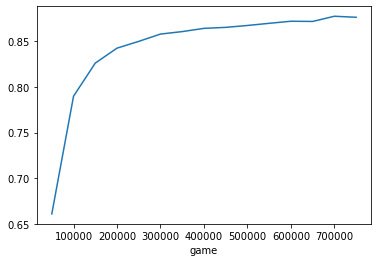

In [6]:
#Plot the training process for all games
import matplotlib.pyplot as plt
win_df.loc[:,'win_ratio'].plot();

In [7]:
#Save the trained player
import pickle
with open('trained_player.pkl', 'wb') as file:
    pickle.dump(player, file)

In [8]:
#Check updated weights for player
for key, value in player.positions.items():
    print(f'{key}:{value}')

(9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0):[10251, 175, 41498, 0, 594236, 0, 94, 614, 4001]
(9.0, 9.0, 9.0, 9.0, 9.0, 1.0, 9.0, 9.0, 9.0):[0, 0, 0, 0, 67429, 0, 0, 0, 0]
(9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 1.0, 9.0):[0, 0, 0, 0, 65164, 0, 0, 0, 0]
(9.0, 9.0, 9.0, 1.0, 9.0, 9.0, 9.0, 9.0, 9.0):[0, 0, 65736, 0, 0, 0, 0, 0, 0]
(9.0, 9.0, 1.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0):[0, 0, 0, 0, 0, 0, 53651, 0, 0]
(9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 1.0):[0, 0, 0, 0, 0, 37568, 0, 0, 0]
(1.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0):[0, 0, 0, 0, 67015, 0, 0, 0, 0]
(9.0, 9.0, 9.0, 9.0, 1.0, 9.0, 9.0, 9.0, 9.0):[0, 12605, 0, 0, 0, 0, 0, 0, 0]
(9.0, 1.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0):[0, 0, 0, 0, 66870, 0, 0, 0, 0]
(9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 1.0, 9.0, 9.0):[0, 38836, 0, 0, 0, 0, 0, 0, 0]
(9, 0, 9, 9, 9, 9, 9, 9, 1):[109, 0, 161, 23, 185, 55, 55, 93, 0]
(9, 9, 9, 9, 9, 0, 9, 1, 9):[22, 16, 36, 32, 66, 0, 29, 0, 45]
(9, 9, 1, 9, 9, 9, 9, 9, 0):[683, 306, 0, 12, 3522, 0, 665, 229, 0]
(9, 9,

(9, 0, 1, 1, 9, 1, 9, 0, 9):[17, 0, 0, 0, 20, 0, 20, 0, 20]
(1, 9, 1, 9, 0, 9, 9, 0, 1):[0, 40, 0, 8, 0, 30, 13, 0, 0]
(9, 9, 1, 0, 1, 0, 9, 9, 1):[14, 17, 0, 0, 0, 0, 11, 14, 0]
(9, 1, 0, 9, 0, 1, 1, 9, 9):[893, 0, 0, 8, 0, 0, 0, 14, 853]
(9, 0, 9, 1, 1, 0, 1, 9, 9):[212, 0, 248, 0, 0, 0, 0, 0, 0]
(9, 9, 0, 1, 1, 0, 9, 9, 1):[1412, 41, 0, 0, 0, 0, 0, 0, 0]
(1, 9, 9, 9, 1, 0, 9, 1, 0):[0, 24, 20, 20, 0, 0, 17, 0, 0]
(9, 1, 9, 0, 1, 0, 9, 9, 1):[14, 0, 14, 0, 0, 0, 17, 20, 0]
(9, 0, 1, 9, 9, 1, 1, 9, 0):[22, 0, 0, 14, 22, 0, 0, 11, 0]
(0, 1, 1, 0, 9, 9, 1, 9, 9):[0, 0, 0, 0, 20, 17, 0, 20, 20]
(9, 0, 1, 1, 9, 9, 0, 9, 1):[17, 0, 0, 0, 20, 20, 0, 17, 0]
(9, 0, 1, 9, 0, 9, 9, 1, 1):[14, 0, 0, 19, 0, 14, 17, 0, 0]
(1, 1, 9, 9, 1, 9, 0, 0, 9):[0, 0, 20, 20, 0, 17, 0, 0, 20]
(9, 0, 9, 0, 1, 9, 1, 1, 9):[24, 0, 20, 0, 0, 20, 0, 0, 20]
(9, 9, 1, 0, 0, 1, 1, 9, 9):[23, 11, 0, 0, 0, 0, 0, 20, 17]
(9, 1, 0, 9, 9, 0, 1, 1, 9):[17, 0, 0, 20, 20, 0, 0, 0, 20]
(1, 1, 9, 9, 1, 0, 9, 0, 9):[0, 0, 22, 2

(1, 9, 1, 1, 0, 1, 9, 0, 0):[0, 202, 0, 0, 0, 0, 148, 0, 0]
(1, 0, 1, 0, 9, 9, 1, 1, 0):[0, 0, 0, 0, 20, 0, 0, 0, 0]
(0, 1, 1, 9, 1, 9, 0, 0, 1):[0, 0, 0, 284, 0, 20, 0, 0, 0]
(0, 0, 1, 1, 9, 0, 1, 1, 9):[0, 0, 0, 0, 11, 0, 0, 0, 5]
(0, 0, 1, 1, 9, 9, 0, 1, 1):[0, 0, 0, 0, 2, 20, 0, 0, 0]
(1, 0, 0, 9, 9, 1, 1, 0, 1):[0, 0, 0, 2, 118, 0, 0, 0, 0]
(0, 1, 0, 1, 0, 1, 9, 1, 9):[0, 0, 0, 0, 0, 0, 1000, 0, 1842]
(0, 1, 1, 1, 9, 0, 0, 1, 9):[0, 0, 0, 0, 20, 0, 0, 0, 2]
(0, 0, 1, 1, 1, 9, 0, 9, 1):[0, 0, 0, 0, 0, 20, 0, 0, 0]
(9, 0, 1, 1, 1, 0, 9, 1, 0):[0, 0, 0, 0, 0, 0, 20, 0, 0]
(9, 1, 1, 1, 9, 0, 0, 0, 1):[20, 0, 0, 0, 2, 0, 0, 0, 0]
(1, 1, 9, 1, 9, 0, 0, 1, 0):[0, 0, 20, 0, 14, 0, 0, 0, 0]
(9, 1, 1, 0, 9, 0, 1, 0, 1):[14, 0, 0, 0, 46, 0, 0, 0, 0]
(0, 1, 0, 1, 0, 9, 9, 1, 1):[0, 0, 0, 0, 0, 0, 2024, 0, 0]
(1, 1, 9, 9, 0, 0, 0, 1, 1):[0, 0, 1420, 942, 0, 0, 0, 0, 0]
(9, 1, 9, 1, 0, 1, 0, 1, 0):[1042, 0, 760, 0, 0, 0, 0, 0, 0]
(1, 9, 0, 0, 1, 1, 1, 9, 0):[0, 20, 0, 0, 0, 0, 0, 20, 0]
(1, 1, 

In [9]:
# This is a function to display the board with corresponding weights(probabilities) of ai player
def display_board(pos):
    pos_list = list(pos)
    weights = (player.positions[pos] / np.array(player.positions[pos]).sum()).round(3)
    for i in range(len(pos)):      
        if pos_list[i] == 9:
            pos_list[i] = f'{weights[i]:.0%}'
        else:
            n = 'X' if pos_list[i]==1 else 'O'
            pos_list[i] = n
    print(pd.DataFrame(np.array(pos_list).reshape(3,3)).to_string(index=False, header=False, col_space=7))
    print(f'\nValues = {player.positions[pos]}')
    print(f'\nWeights = {weights}')

In [10]:
display_board((9, 9, 1, 9, 0, 9, 1, 9, 9))

    18%     15%       X
    20%       O     18%
      X     12%     18%

Values = [20, 17, 0, 22, 0, 20, 0, 14, 20]

Weights = [0.177 0.15  0.    0.195 0.    0.177 0.    0.124 0.177]


### Further Steps & Comments

* A more detailed performance analysis should be made based on whether AIPlayer started the game
* When tested against myself, it is an ok player but I still see unexpected/incorrect moves. Training rounds could be increased, or initialization of weights and punishment/reward rates could be tweaked to get better results
* A simple GUI can be created for the game
* Train and evaluation options could be provided for AIPlayer Class (currently it updates the weights in every game)
* Some board positions are 'blocked'. AIPlayer has low probabilites for moves leading to these positions, so these board states are not well learned. (they are not expected to make much of an effect on win ratio though)